Author: Ng Ru Ying

COVID-19 Case Trend Analysis (Aug-Oct 2021)

Case numbers web scraped from MOH Press releases.

In [1]:
import pandas as pd

In [2]:
df = pd.read_excel('./covid_2021.xlsx')
df.head()

,event,date,day,cases,event_occurred,14_day,13_day,12_day,11_day,10_day,3_day,24_day,25_day,26_day,27_day,28_day,spike
0,NDP1,2021-08-09,Monday,69.0,1.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0.0
1,NaN,2021-08-10,Tuesday,NaN,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0.0
2,NaN,2021-08-11,Wednesday,NaN,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0.0
3,NaN,2021-08-12,Thursday,NaN,0.0,0.0,0,0,0,0.0,1.0,0,0,0,0,0,0.0
4,NaN,2021-08-13,Friday,NaN,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0.0


In [3]:
df2 = df.drop(columns=['event','day'])
df2

,date,cases,event_occurred,14_day,13_day,12_day,11_day,10_day,3_day,24_day,25_day,26_day,27_day,28_day,spike
0,2021-08-09,69.0,1.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0.0
1,2021-08-10,NaN,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0.0
2,2021-08-11,NaN,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0.0
3,2021-08-12,NaN,0.0,0.0,0,0,0,0.0,1.0,0,0,0,0,0,0.0
4,2021-08-13,NaN,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,2021-10-16,2688.0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0.0
69,2021-10-17,2454.0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0.0
70,2021-10-18,2008.0,0.0,0.0,0,0,0,0.0,0.0,1,0,0,0,0,0.0
71,2021-10-19,3480.0,0.0,0.0,0,0,0,1.0,0.0,0,1,0,0,0,1.0


In [4]:
df2['cases']=df2['cases'].fillna(df2['cases'].rolling(5,min_periods=1).mean())
df2.head()

,date,cases,event_occurred,14_day,13_day,12_day,11_day,10_day,3_day,24_day,25_day,26_day,27_day,28_day,spike
0,2021-08-09,69.0,1.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0.0
1,2021-08-10,69.0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0.0
2,2021-08-11,69.0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0.0
3,2021-08-12,69.0,0.0,0.0,0,0,0,0.0,1.0,0,0,0,0,0,0.0
4,2021-08-13,69.0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0.0


In [5]:
df2.dropna(inplace=True)

# Add new column of likelihood
From prior analysis, we see that spikes often happen at the 10 day or 14 day mark.
A likelihood column is added to give a quantitative value.
This gives a better prediction when there are overlapping events.

In [6]:
df2.columns

Index(['date', 'cases', 'event_occurred', '14_day', '13_day', '12_day',
       '11_day', '10_day', '3_day', '24_day', '25_day', '26_day', '27_day',
       '28_day', 'spike'],
      dtype='object')

In [7]:
def assign_value(row):
    values = {'14_day':6,
     '13_day':5,
     '12_day':4,
     '11_day':3,
     '10_day':2,
     '3_day':1,
     '24_day':1,
    #  '25_day':1,
    #  '26_day':1,
    #  '27_day':1,
     '28_day':1}
    total = 0
    for key in values.keys():
        if row[key]==1:
            total+=values.get(key)
    return total

df2['likelihood']= df2.apply(assign_value, axis=1)
df2['likelihood'].value_counts()

likelihood
0     21
1     19
2      5
20     5
5      4
6      4
4      3
7      3
3      2
10     1
14     1
21     1
18     1
15     1
11     1
Name: count, dtype: int64

In [8]:
df2[(df2['spike']==1)].head()

,date,cases,event_occurred,14_day,13_day,12_day,11_day,10_day,3_day,24_day,25_day,26_day,27_day,28_day,spike,likelihood
14,2021-08-23,94.0,0.0,1.0,0,0,0,0.0,0.0,0,0,0,0,0,1.0,6
29,2021-09-07,328.0,1.0,0.0,0,0,0,0.0,1.0,0,0,0,0,0,1.0,1
31,2021-09-09,450.0,1.0,0.0,0,0,0,0.0,1.0,0,0,0,0,0,1.0,1
32,2021-09-10,568.0,1.0,0.0,0,0,0,0.0,1.0,0,0,0,0,0,1.0,1
34,2021-09-12,454.0,1.0,0.0,0,0,0,0.0,1.0,0,0,0,0,0,1.0,1


In [9]:
import plotly.express as px

# Assuming df2 is your DataFrame with the 'likelihood' column
fig = px.bar(df2, 
             x='date',
             y='cases',
             color='likelihood',
             text_auto=True,
             color_continuous_scale=[
                 [0.0, 'black'],   # Black for 0
                 [0.05, 'yellow'], # Yellow for values close to 1
                 [0.10, 'orange'], # Keep yellow until a little after 1
                 [0.5, 'red'],  # Continue yellow
                 [1.0, 'red']      # Red at higher values like 20
             ],
             range_color=[0, 20],  # Adjust the range to fit your likelihood values
             title="Cases by Date with Likelihood Highlighted",
            )

fig.update_layout(
    xaxis=dict(
        tickangle=90,  # Rotate labels by 45 degrees (adjust as needed)
        tickmode='array',  # Ensure all tick labels are shown
        tickvals=df2['date'],  # Show all dates on the x-axis
        tickformat='%d %b'
    )
)

# Show the plot
fig.show()


Likelihood:
Yellow: 1
Orange: 2-3
Red: >=4

From the figure, we can see that when likelihood is high (red, >=4 likelihood), a spike tends to occur.
A clearer demarcation of events and corresponding spikes are as shown below.

Note that at yellow and orange bars (1-3), there tends to be an upward trend, although not always.
During this period (just after a 3 day incubation period, or a lingering 2nd wave), it is possible that there is a delay as symptoms tend to appear slightly after this incubation period. Thus, yellow/orange periods may indicate that there are more "asymptomatic" patients in the public, and the user can start taking precautions when in the public (e.g. paying closer attention to hygiene, wearing masks in crowded indoor places).

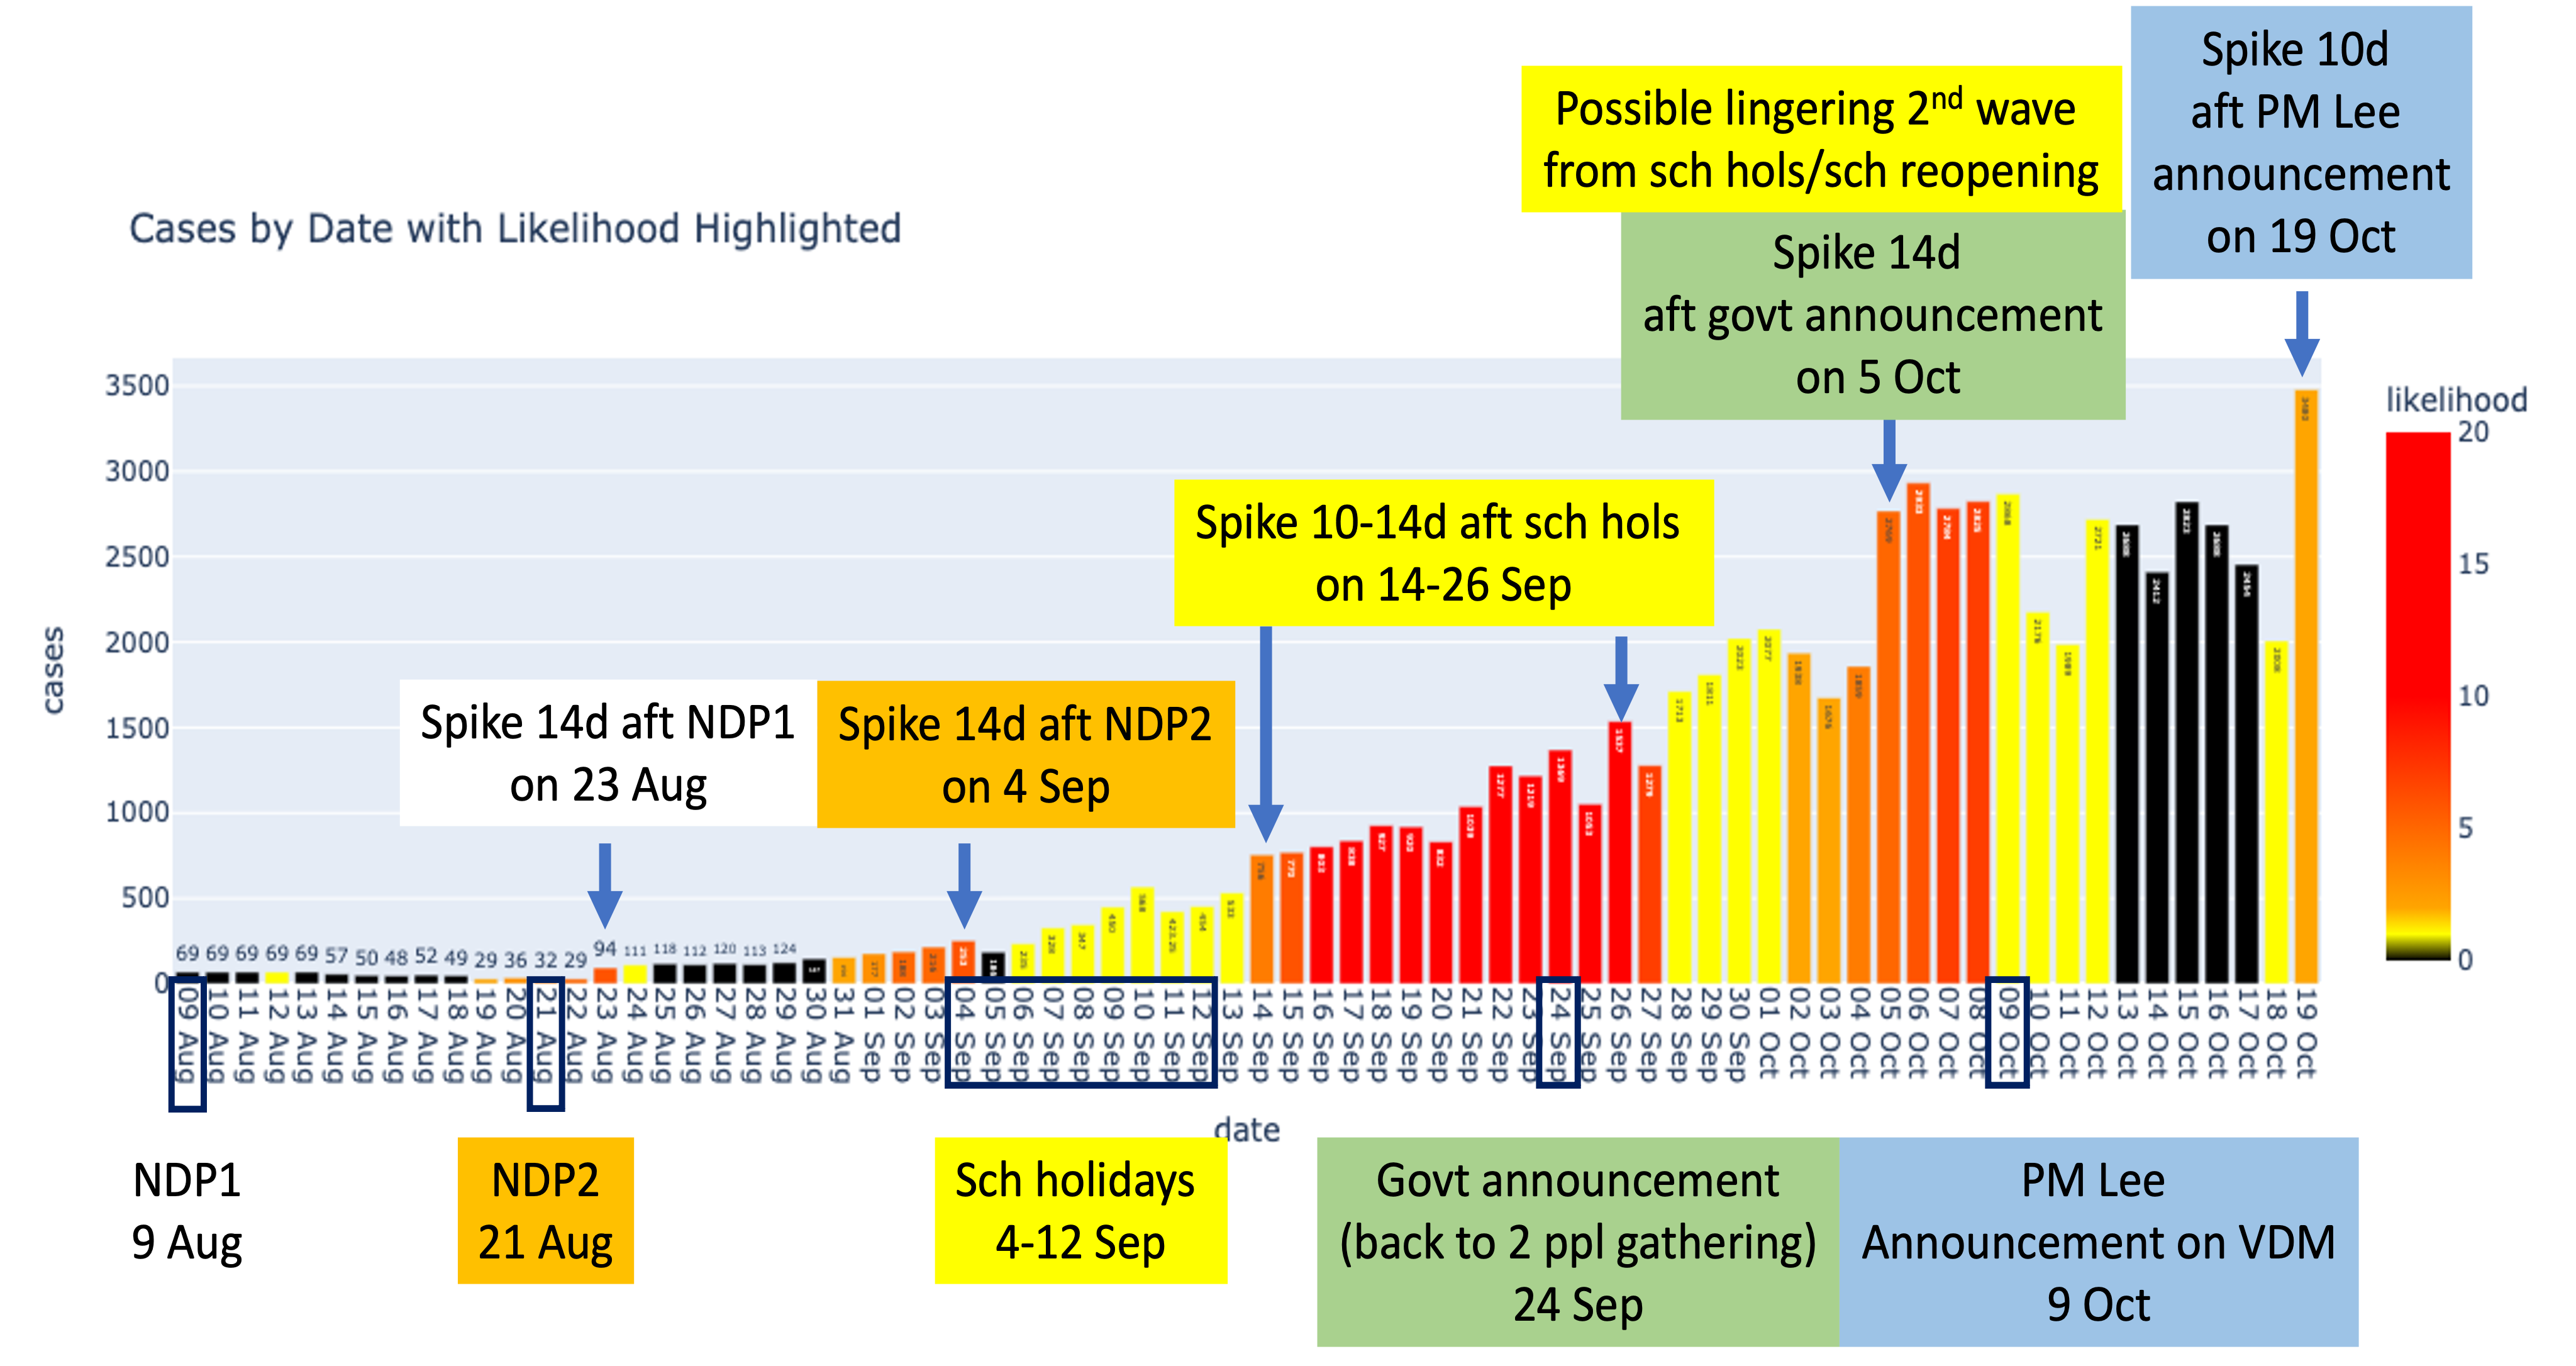

In [10]:
from IPython.display import Image
Image(filename="./covid_diagram.png")

In [12]:
# List of events
df.dropna()

,event,date,day,cases,event_occurred,14_day,13_day,12_day,11_day,10_day,3_day,24_day,25_day,26_day,27_day,28_day,spike
0,NDP1,2021-08-09,Monday,69.0,1.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0.0
12,NDP2,2021-08-21,Saturday,32.0,1.0,0.0,0,1,0,0.0,0.0,0,0,0,0,0,0.0
26,sch hols,2021-09-04,Saturday,253.0,1.0,1.0,0,0,0,0.0,0.0,0,0,1,0,0,0.0
27,sch hols,2021-09-05,Sunday,186.0,1.0,0.0,0,0,0,0.0,0.0,0,0,0,1,0,0.0
28,sch hols,2021-09-06,Monday,235.0,1.0,0.0,0,0,0,0.0,0.0,0,0,0,0,1,0.0
29,sch hols,2021-09-07,Tuesday,328.0,1.0,0.0,0,0,0,0.0,1.0,0,0,0,0,0,1.0
30,sch hols,2021-09-08,Wednesday,347.0,1.0,0.0,0,0,0,0.0,1.0,0,0,0,0,0,0.0
31,sch hols,2021-09-09,Thursday,450.0,1.0,0.0,0,0,0,0.0,1.0,0,0,0,0,0,1.0
32,sch hols,2021-09-10,Friday,568.0,1.0,0.0,0,0,0,0.0,1.0,0,0,0,0,0,1.0
34,sch hols,2021-09-12,Sunday,454.0,1.0,0.0,0,0,0,0.0,1.0,0,0,0,0,0,1.0
